## PART IV: Simple RNN with Sine Wave Data and Keras

In [1]:
#Imported Basic libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
#Timeseries RNN neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [4]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.preprocessing import MinMaxScaler

## Sine wave creation

In [5]:
x = np.linspace(0,50,768)
y = np.sin(x)

In [6]:
x

array([ 0.        ,  0.06518905,  0.1303781 ,  0.19556714,  0.26075619,
        0.32594524,  0.39113429,  0.45632334,  0.52151239,  0.58670143,
        0.65189048,  0.71707953,  0.78226858,  0.84745763,  0.91264668,
        0.97783572,  1.04302477,  1.10821382,  1.17340287,  1.23859192,
        1.30378096,  1.36897001,  1.43415906,  1.49934811,  1.56453716,
        1.62972621,  1.69491525,  1.7601043 ,  1.82529335,  1.8904824 ,
        1.95567145,  2.0208605 ,  2.08604954,  2.15123859,  2.21642764,
        2.28161669,  2.34680574,  2.41199478,  2.47718383,  2.54237288,
        2.60756193,  2.67275098,  2.73794003,  2.80312907,  2.86831812,
        2.93350717,  2.99869622,  3.06388527,  3.12907432,  3.19426336,
        3.25945241,  3.32464146,  3.38983051,  3.45501956,  3.5202086 ,
        3.58539765,  3.6505867 ,  3.71577575,  3.7809648 ,  3.84615385,
        3.91134289,  3.97653194,  4.04172099,  4.10691004,  4.17209909,
        4.23728814,  4.30247718,  4.36766623,  4.43285528,  4.49

In [7]:
y

array([ 0.        ,  0.06514289,  0.13000904,  0.1943229 ,  0.25781126,
        0.3202044 ,  0.38123728,  0.44065063,  0.49819205,  0.55361709,
        0.60669031,  0.65718624,  0.70489037,  0.74960006,  0.79112536,
        0.82928988,  0.86393148,  0.89490301,  0.9220729 ,  0.94532572,
        0.9645627 ,  0.97970211,  0.99067964,  0.99744866,  0.99998041,
        0.99826414,  0.99230713,  0.98213469,  0.96779005,  0.94933412,
        0.92684533,  0.90041919,  0.87016798,  0.8362202 ,  0.79872006,
        0.75782688,  0.71371437,  0.66656992,  0.61659382,  0.56399835,
        0.50900696,  0.45185326,  0.39278003,  0.33203823,  0.2698859 ,
        0.20658706,  0.14241062,  0.0776292 ,  0.01251801, -0.05264636,
       -0.11758708, -0.18202829, -0.24569621, -0.30832039, -0.3696348 ,
       -0.42937895, -0.48729906, -0.54314907, -0.59669172, -0.64769957,
       -0.69595591, -0.74125576, -0.78340668, -0.8222296 , -0.8575596 ,
       -0.8892466 , -0.91715598, -0.94116918, -0.9611842 , -0.97

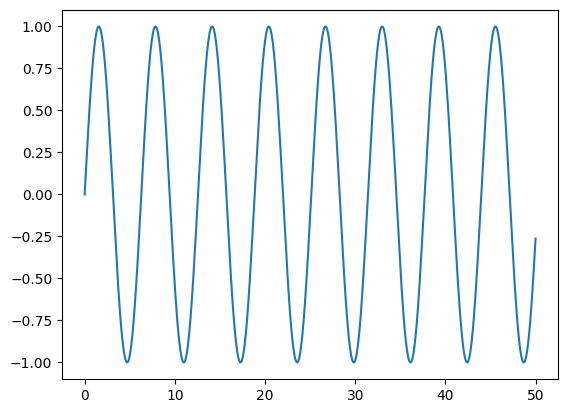

In [8]:
plt.plot(x, y)

In [9]:
# Index: x; Data: y; column label: Sine
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [10]:
df.head(8)

,Sine
0.000000,0.000000
0.065189,0.065143
0.130378,0.130009
0.195567,0.194323
0.260756,0.257811
0.325945,0.320204
0.391134,0.381237
0.456323,0.440651


In [11]:
len(df)

768

In [12]:
# a predetermined percentage of the data is used for testing
test_percent = 0.2

In [13]:
# a group of data points designated for testing the model
# 20% of the original dataset
len(df)*test_percent

153.60000000000002

In [14]:
# finding the length of the testing dataset
# 153.6 data points are used for testing
test_length = np.round(len(df)*test_percent)

In [15]:
test_length

154.0

In [16]:
# Index starting with 0
test_start_index = int(len(df) - test_length)

In [17]:
test_start_index

614

In [18]:
# Training dataset: All the indices from start to test_start_index
# (Do not include test_start_index)
data_train = df.iloc[: test_start_index]

# Testing dataset: All the indices fromt test_start_index to the dataframe
# (including test_start_index)
data_test = df.iloc[test_start_index :]

In [19]:
data_train.head(5)

,Sine
0.000000,0.000000
0.065189,0.065143
0.130378,0.130009
0.195567,0.194323
0.260756,0.257811


In [20]:
data_test.head(5)

,Sine
40.026076,0.727471
40.091265,0.681229
40.156454,0.632093
40.221643,0.580271
40.286832,0.525985


## Normalizing Data

In [21]:
#To standardize the data a MinMaxscaler was constructed
scaler = MinMaxScaler()

In [22]:
scaler.fit(data_train)

MinMaxScaler()

In [23]:
# Normalize the training dataset
normalized_train = scaler.transform(data_train)

# Normalize the testing dataset
normalized_test = scaler.transform(data_test)

## Timeseries Generator

In [24]:
# TimeseriesGenerator: Create time series batches for training and testing

# Use 64 historical data points to predict the next one
length = 64

In [25]:
#batcgh_size =Number of Time series  samples in a batch
batch_size = 1

In [26]:
# Create a TimeseriesGenerator for training: training_tsGenerator
# TimeseriesGenerator(inputs dataset, outputs dataset, length, batch_size)
train_tsGenerator64 = TimeseriesGenerator(normalized_train, normalized_train, length=length, batch_size=batch_size)

In [27]:
len(normalized_train)

614

In [28]:
X,y = train_tsGenerator64[0]

In [29]:
# Print X.flatten()
X.flatten()

array([0.49999847, 0.53257003, 0.56500322, 0.59716027, 0.62890456,
       0.66010125, 0.6906178 , 0.72032458, 0.74909539, 0.77680802,
       0.80334472, 0.82859278, 0.85244493, 0.87479986, 0.89556258,
       0.91464491, 0.93196578, 0.9474516 , 0.96103659, 0.97266304,
       0.98228157, 0.9898513 , 0.99534009, 0.99872461, 0.99999049,
       0.99913235, 0.99615383, 0.9910676 , 0.98389525, 0.97466725,
       0.96342281, 0.9502097 , 0.93508404, 0.91811008, 0.89935995,
       0.87891328, 0.85685695, 0.83328464, 0.80829649, 0.78199867,
       0.75450287, 0.72592592, 0.69638919, 0.66601818, 0.63494191,
       0.60329237, 0.57120403, 0.53881321, 0.50625749, 0.47367519,
       0.44120471, 0.40898399, 0.37714991, 0.34583771, 0.31518039,
       0.28530821, 0.25634805, 0.22842294, 0.20165152, 0.1761475 ,
       0.15201924, 0.12936924, 0.1082937 , 0.08888217])

In [30]:
# Print y: What does X predict
y

array([[0.07121711]])

## Build, Train, and Test a simple model

In [31]:
# Features: How many features used to train the model: Only one
n_Features = 1

# define model
model = Sequential()

# Add a simple RNN layer: Using SimpleRRN cells
# This layer has 100 neurons: One neuron for each input data point
# Notes: # time series steps of the input sequence: 64
model.add(SimpleRNN(64, input_shape=(length, n_Features)))

# Add a fully-connected layer for the final prediction
# Only one neuro of the Dense/Fully-Connected layer
# --> Output: Predict the next data point of the input sequence: only one value
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compile Model

In [32]:
# Loss function: mse
# Optimizer: Adam
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

## Train (Fit) Model

In [33]:
model.fit(train_tsGenerator64, epochs=10)

Epoch 1/10
 10/550 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0322 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.0035
Epoch 2/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 4.7160e-04
Epoch 3/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.3242e-04
Epoch 4/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.8763e-05
Epoch 5/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 5.7183e-05
Epoch 6/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.3675e-04
Epoch 7/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 1.1445e-05
Epoch 8/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 5.8153e-05
Epoch 9/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 1.5906e-04
Epoch 10/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 6.0596e-06


## Visualize Model Performance After Training

<Axes: >

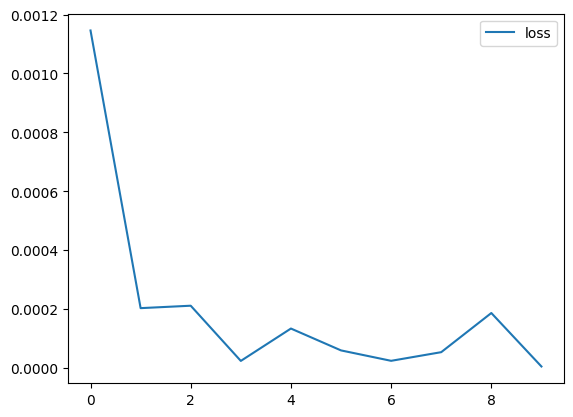

In [34]:
# Load the loss data
df_model_loss = pd.DataFrame(model.history.history)

# Visualize the loss
df_model_loss.plot()

In [35]:
# Number of time steps of the input time series
length

64

In [36]:
# 1st time series batch (50 data points)
# array[-length:]: A sequence of [50th to the last .. last]
first_eval_batch = normalized_train[-length :]

first_eval_batch

array([[1.86944737e-02],
       [1.08928046e-02],
       [5.16890884e-03],
       [1.54710213e-03],
       [4.27702903e-05],
       [6.62303882e-04],
       [3.40307106e-03],
       [8.25342876e-03],
       [1.51927721e-02],
       [2.41916221e-02],
       [3.52117506e-02],
       [4.82063429e-02],
       [6.31201967e-02],
       [7.98899561e-02],
       [9.84443817e-02],
       [1.18704652e-01],
       [1.40584699e-01],
       [1.63991575e-01],
       [1.88825844e-01],
       [2.14982008e-01],
       [2.42348952e-01],
       [2.70810419e-01],
       [3.00245501e-01],
       [3.30529155e-01],
       [3.61532733e-01],
       [3.93124529e-01],
       [4.25170336e-01],
       [4.57534021e-01],
       [4.90078100e-01],
       [5.22664322e-01],
       [5.55154256e-01],
       [5.87409883e-01],
       [6.19294177e-01],
       [6.50671690e-01],
       [6.81409127e-01],
       [7.11375912e-01],
       [7.40444742e-01],
       [7.68492132e-01],
       [7.95398931e-01],
       [8.21050837e-01],


In [37]:
first_eval_batch = first_eval_batch.reshape((1, length, n_Features))

first_eval_batch

array([[[1.86944737e-02],
        [1.08928046e-02],
        [5.16890884e-03],
        [1.54710213e-03],
        [4.27702903e-05],
        [6.62303882e-04],
        [3.40307106e-03],
        [8.25342876e-03],
        [1.51927721e-02],
        [2.41916221e-02],
        [3.52117506e-02],
        [4.82063429e-02],
        [6.31201967e-02],
        [7.98899561e-02],
        [9.84443817e-02],
        [1.18704652e-01],
        [1.40584699e-01],
        [1.63991575e-01],
        [1.88825844e-01],
        [2.14982008e-01],
        [2.42348952e-01],
        [2.70810419e-01],
        [3.00245501e-01],
        [3.30529155e-01],
        [3.61532733e-01],
        [3.93124529e-01],
        [4.25170336e-01],
        [4.57534021e-01],
        [4.90078100e-01],
        [5.22664322e-01],
        [5.55154256e-01],
        [5.87409883e-01],
        [6.19294177e-01],
        [6.50671690e-01],
        [6.81409127e-01],
        [7.11375912e-01],
        [7.40444742e-01],
        [7.68492132e-01],
        [7.9

In [38]:
first_eval_batch.shape

(1, 64, 1)

## Model evalution

In [39]:
# Make a list to hold all of the predictions
# Similar to: test_predictions = list();
test_predictions = []

# The 1st batch: The 1st time series input sequence
# = the last 64 data points of the train data set
first_eval_batch = normalized_train[-length:]

# restructure the batch into three dimensional array:
current_batch = first_eval_batch.reshape((1, length, n_Features))

# Run a FOR loop to make a prediction for each batch
for i in range(len(data_test)):

 # Get the value of the first element: The prediction
    current_pred = model.predict(current_batch)[0]

    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

In [40]:
# Converted the scaled result back to the real values
true_predictions = scaler.inverse_transform(test_predictions)

true_predictions

array([[ 0.72915787],
       [ 0.68440591],
       [ 0.63766459],
       [ 0.58869896],
       [ 0.53828148],
       [ 0.48643421],
       [ 0.43357057],
       [ 0.38013389],
       [ 0.32619295],
       [ 0.27199393],
       [ 0.21794916],
       [ 0.16433486],
       [ 0.11154846],
       [ 0.05949639],
       [ 0.00883299],
       [-0.04038835],
       [-0.08782197],
       [-0.13336333],
       [-0.17682277],
       [-0.21786512],
       [-0.25653153],
       [-0.2925419 ],
       [-0.32583848],
       [-0.35638248],
       [-0.38405705],
       [-0.40893814],
       [-0.43095578],
       [-0.45020455],
       [-0.46669138],
       [-0.48054035],
       [-0.491864  ],
       [-0.50076234],
       [-0.50743103],
       [-0.51197295],
       [-0.51458723],
       [-0.51542914],
       [-0.51465992],
       [-0.512509  ],
       [-0.50903761],
       [-0.50450675],
       [-0.49898267],
       [-0.49264493],
       [-0.48559826],
       [-0.477932  ],
       [-0.46974563],
       [-0

In [41]:

data_test

,Sine
40.026076,0.727471
40.091265,0.681229
40.156454,0.632093
40.221643,0.580271
40.286832,0.525985
...,...
49.739244,-0.502284
49.804433,-0.444888
49.869622,-0.385602
49.934811,-0.324678


In [42]:
# adding the actual forecast findings into the initial data frame of the test data
# Added as another column
data_test['Predictions'] = true_predictions

<ipython-input-42-cb9a0b2bc2a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Predictions'] = true_predictions


In [43]:
# Update data_test
data_test

,Sine,Predictions
40.026076,0.727471,0.729158
40.091265,0.681229,0.684406
40.156454,0.632093,0.637665
40.221643,0.580271,0.588699
40.286832,0.525985,0.538281
...,...,...
49.739244,-0.502284,-0.193245
49.804433,-0.444888,-0.182244
49.869622,-0.385602,-0.170513
49.934811,-0.324678,-0.158092


<Axes: >

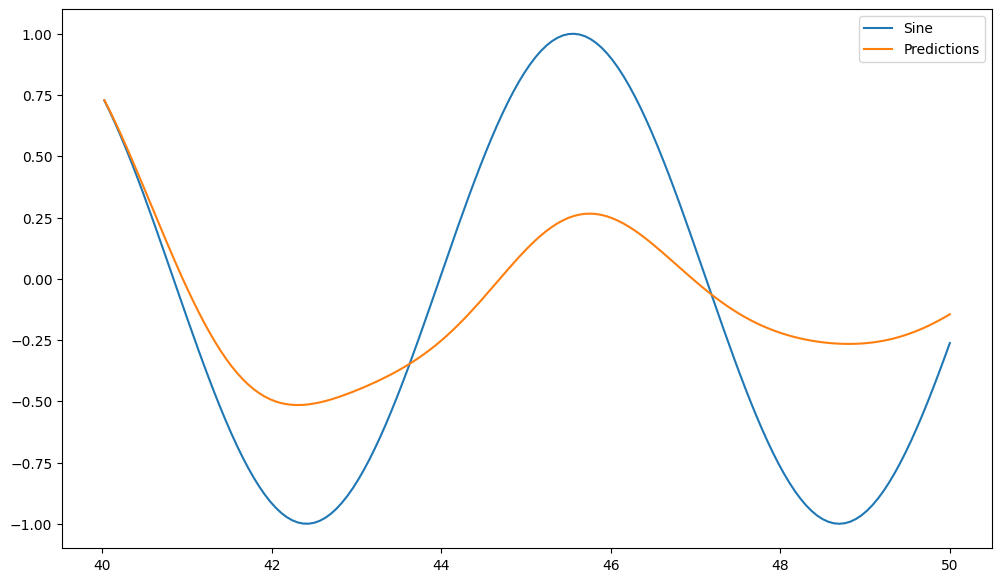

In [44]:
# Visualize the data of the updated test data
# Compare the predicted sine wave against the original sine wave

data_test.plot(figsize=(12,7))